# Trabalho 6
Considere os dados:

| X   | F(X) |
| --- | ---- |
| 1   | 0    |
| 2   | 5    |
| 2.5 | 6.5  |
| 3   | 7    |
| 4   | 3    |
| 5   | 1    |



## a) Calcule F(x) para \( x=3.4 \) usando os polinômios de Newton de primeiro a terceiro graus. Escolha a sequência de pontos para fazer sua estimativa de modo a atingir a melhor exatidão possível.


### Manual

Para achar a melhor exatidão possível, vamos usar os pontos mais próximos de 3.4


P1 = 19.0 - 4.0*x
P2 = 1.0*x**2 - 11.0*x + 31.0
P3 = 1.73333333333333*x**3 - 19.8*x**2 + 70.4666666666667*x - 73.0
P1(3.4) = 5.400
P2(3.4) = 5.160
P3(3.4) = 5.826


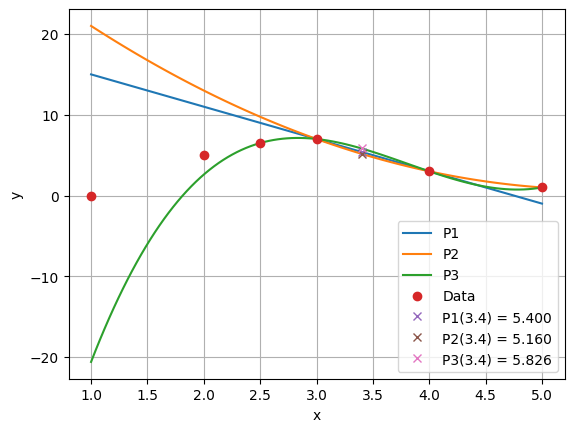

In [53]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

def f(i, j):
	return (F_X[j] - F_X[i])/(X[j] - X[i])

# Data
X = [1, 2, 2.5, 3, 4, 5]
F_X = [0, 5, 6.5, 7, 3, 1]

x = sym.symbols('x')

# First order polynomial
b0 = F_X[3]
b1 = f(3, 4)

P1 = b0 + (b1 * (x - X[3]))

print('P1 =', P1)

# Second order polynomial
b0 = F_X[3]
b1 = f(3, 4)
b2 = (f(3, 4) - f(4, 5)) / (X[3] - X[5])
P2 = b0 + (b1 * (x - X[3])) + (b2 * (x - X[3]) * (x - X[4]))

P2 = sym.simplify(P2)

print('P2 =', P2)

# Third order polynomial
b0 = F_X[2]
b1 = f(2, 3)
b2 = (f(2, 3) - f(3, 4)) / (X[2] - X[4])
b3 = ((f(2, 3) - f(3, 4)) / (X[2] - X[4]) - (f(3, 4) - f(4, 5)) / (X[3] - X[5])) / (X[2] - X[5])

P3 = b0 + (b1 * (x - X[2])) + (b2 * (x - X[2]) * (x - X[3])) + (b3 * (x - X[2]) * (x - X[3]) * (x - X[4]))

P3 = sym.simplify(P3)
print('P3 =', P3)


# Solving P1(3.4)
y_1_3_4 = P1.subs(x, 3.4)
print('P1(3.4) =', round(y_1_3_4, 3))

# Solving P2(3.4)
y_2_3_4 = P2.subs(x, 3.4)
print('P2(3.4) =', round(y_2_3_4, 3))

# Solving P3(3.4)
y_3_3_4 = P3.subs(x, 3.4)
print('P3(3.4) =', round(y_3_3_4, 3))


# Plotting
x_plot = np.linspace(1, 5, 100)
y_plot = [P1.subs(x, i) for i in x_plot]
plt.plot(x_plot, y_plot, label='P1')

y_plot = [P2.subs(x, i) for i in x_plot]
plt.plot(x_plot, y_plot, label='P2')

y_plot = [P3.subs(x, i) for i in x_plot]
plt.plot(x_plot, y_plot, label='P3')

plt.plot(X, F_X, 'o', label='Data')

# Plotting P1(3.4)
plt.plot(3.4, y_1_3_4, 'x', label='P1(3.4) = ' + str(round(y_1_3_4, 3)))

# Plotting P2(3.4)
plt.plot(3.4, y_2_3_4, 'x', label='P2(3.4) = ' + str(round(y_2_3_4, 3)))

# Plotting P3(3.4)
plt.plot(3.4, y_3_3_4, 'x', label='P3(3.4) = ' + str(round(y_3_3_4, 3)))

plt.xlabel('x')
plt.ylabel('y')

plt.grid()



plt.legend()



### Resolução por computador

X_Slice = [3, 4]
Y_Slice = [7, 3]
coef = [ 7. -4.]
P1(3.4) = 5.4
X_Slice = [3, 4, 5]
Y_Slice = [7, 3, 1]
coef = [ 7. -4.  1.]
P2(3.4) = 5.16
X_Slice = [2.5, 3, 4, 5]
Y_Slice = [6.5, 7, 3, 1]
coef = [ 6.5         1.         -3.33333333  1.73333333]
P3(3.4) = 5.826


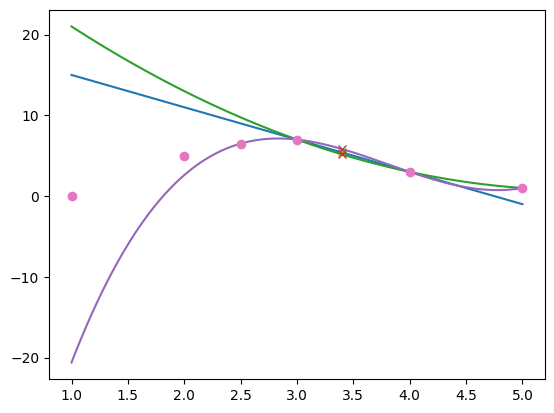

In [44]:
def divided_diff(x, y):
	'''
	function to calculate the divided
	differences table
	'''
	n = len(y)
	coef = np.zeros([n, n])
	# the first column is y
	coef[:,0] = y

	for j in range(1,n):
		for i in range(n-j):
			coef[i][j] = \
			(coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
			
	return coef

def newton_poly(coef, x_data, x):
	'''
	evaluate the newton polynomial 
	at x
	'''
	n = len(x_data) - 1 
	p = coef[n]
	for k in range(1,n+1):
		p = coef[n-k] + (x -x_data[n-k])*p
	return p


# Data
X = [1, 2, 2.5, 3, 4, 5]
F_X = [0, 5, 6.5, 7, 3, 1]

# Point to interpolate
x = 3.4

# Find the index of the closest point in X to x
closest_idx = np.abs(np.array(X) - x).argmin()

# For degrees 1, 2, and 3
for n in range(1, 4):

	num_points = n + 1

	left_points = num_points // 2
	right_points = num_points - left_points - 1

	# Adjust left_points and right_points if we are at the edges
	left_points = min(left_points, closest_idx)
	right_points = min(right_points, len(X) - closest_idx - 1)

	# Indices of the slice
	start_idx = closest_idx - left_points
	end_idx = closest_idx + right_points + 1

	# Slice the data
	X_Slice = X[start_idx + 1:end_idx + 1]
	Y_Slice = F_X[start_idx + 1:end_idx + 1]

	print('X_Slice =', X_Slice)
	print('Y_Slice =', Y_Slice)

	# Calculate the divided differences table
	coef = divided_diff(X_Slice, Y_Slice)

	# Print the divided differences table
	print('coef =', coef[0, :])

	# Evaluate the polynomial at y
	y_interp = newton_poly(coef[0, :], X_Slice, x)

	# Print the result
	print('P' + str(n) + '(' + str(y) + ') =', round(y_interp, 3))

	# Plotting
	x_plot = np.linspace(1, 5, 100)
	y_plot = [newton_poly(coef[0, :], X_Slice, i) for i in x_plot]
	plt.plot(x_plot, y_plot, label='P' + str(n))

	# Plotting P1(3.4)
	plt.plot(x, y_interp, 'x', label='P' + str(n) + '(' + str(y) + ') = ' + str(round(y_interp, 3)))
plt.plot(X, F_X, 'o', label='Data')
plt.show()





## b) Repita (a), mas utilize polinômios de Lagrange.


### Manual


======== degree 1 ========
X0 = [3, 4]
F_X0 = [7, 3]
P(x) = 19 - 4*x
P(3.4) = 5.400
======== degree 2 ========
X1 = [3, 4, 5]
F_X1 = [7, 3, 1]
P(x) = x**2 - 11*x + 31
P(3.4) = 5.160
======== degree 3 ========
X2 = [2.5, 3, 4, 5]
F_X2 = [6.5, 7, 3, 1]
P(x) = 1.73333333333333*x**3 - 19.8*x**2 + 70.4666666666667*x - 73.0
P(3.4) = 5.826


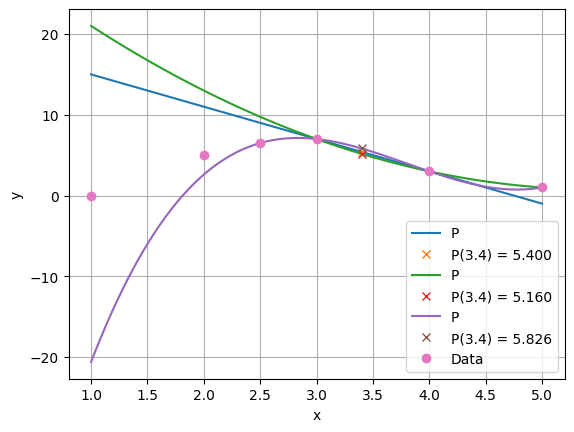

In [70]:
# Lagrange Interpolation


X_S = [
	[3, 4],
	[3, 4, 5],
	[2.5, 3, 4, 5],
]

F_X_S = [
	[7, 3],
	[7, 3, 1],
	[6.5, 7, 3, 1],
]

for i in range(len(X_S)):
	print("======== degree", i + 1, "========")
	print('X' + str(i) + ' =', X_S[i])
	print('F_X' + str(i) + ' =', F_X_S[i])

	X = X_S[i]
	F_X = F_X_S[i]

	# Point to interpolate
	x = sym.symbols('x')

	# Define the Lagrange basis polynomials
	L = []
	for i in range(len(X)):
		L.append(1)
		for j in range(len(X)):
			if i != j:
				L[i] *= (x - X[j]) / (X[i] - X[j])

	# Calculate the interpolating polynomial
	P = 0
	for i in range(len(X)):
		P += F_X[i] * L[i]

	P = sym.simplify(P)
	# Print the result
	print('P(x) =', P)

	# Solving P(3.4)
	y_interp = P.subs(x, 3.4)
	print('P(3.4) =', round(y_interp, 3))

	# Plotting
	x_plot = np.linspace(1, 5, 100)
	y_plot = [P.subs(x, i) for i in x_plot]
	plt.plot(x_plot, y_plot, label='P')

	# Plotting P(3.4)
	plt.plot(3.4, y_interp, 'x', label='P(3.4) = ' + str(round(y_interp, 3)))

X = [1, 2, 2.5, 3, 4, 5]
F_X = [0, 5, 6.5, 7, 3, 1]

plt.plot(X, F_X, 'o', label='Data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid()








### Resolução por computador

======== degree 1 ========
X0 = [3, 4]
F_X0 = [7, 3]
P(x) = [-4. 19.]
P(3.4) = 5.4
======== degree 2 ========
X1 = [3, 4, 5]
F_X1 = [7, 3, 1]
P(x) = [  1. -11.  31.]
P(3.4) = 5.16
======== degree 3 ========
X2 = [2.5, 3, 4, 5]
F_X2 = [6.5, 7, 3, 1]
P(x) = [  1.73333333 -19.8         70.46666667 -73.        ]
P(3.4) = 5.826


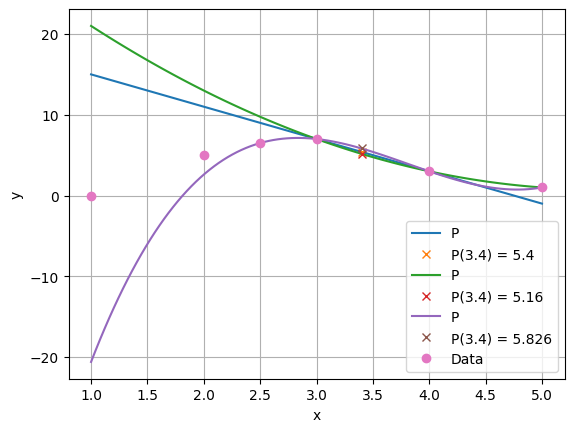

In [71]:
from scipy.interpolate import lagrange

X_S = [
	[3, 4],
	[3, 4, 5],
	[2.5, 3, 4, 5],
]

F_X_S = [
	[7, 3],
	[7, 3, 1],
	[6.5, 7, 3, 1],
]

for i in range(len(X_S)):
	print("======== degree", i + 1, "========")
	print('X' + str(i) + ' =', X_S[i])
	print('F_X' + str(i) + ' =', F_X_S[i])

	X = X_S[i]
	F_X = F_X_S[i]

	# Calculate the interpolating polynomial
	P = lagrange(X, F_X)

	# Print the result
	print('P(x) =', P.coef)

	# Solving P(3.4)
	y_interp = P(3.4)
	print('P(3.4) =', round(y_interp, 3))

	# Plotting
	x_plot = np.linspace(1, 5, 100)
	y_plot = [P(i) for i in x_plot]
	plt.plot(x_plot, y_plot, label='P')

	# Plotting P(3.4)
	plt.plot(3.4, y_interp, 'x', label='P(3.4) = ' + str(round(y_interp, 3)))


X = [1, 2, 2.5, 3, 4, 5]
F_X = [0, 5, 6.5, 7, 3, 1]

plt.plot(X, F_X, 'o', label='Data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid()

